In [1]:
import pandas as pd

# Read the json file
data = pd.read_json('training_90_string.json')



I    72582
E    22878
Name: type, dtype: int64


<AxesSubplot:>

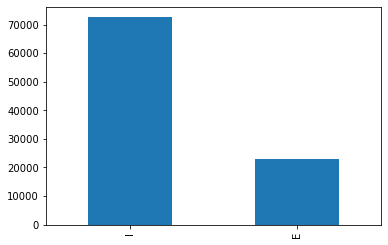

In [2]:
print(data['type'].value_counts())
data['type'].value_counts().plot.bar(x='type', y='Frequency')

In [36]:
#value_counts = data['type'].value_counts()
#counts_without_outliers = list(value_counts)[2:-2]
#counts_average = sum(counts_without_outliers)/len(counts_without_outliers)
#print(counts_average) 

#a_tenth_of_majority = counts_average / 5
#ten_times_of_minority = counts_average * 2

In [37]:
#import math 

#new_value_counts = []

#for value in value_counts:
#    if value > ten_times_of_minority:
#        value = value*ten_times_of_minority/value_counts[0]
#    elif value < a_tenth_of_majority:
#        value = a_tenth_of_majority + 1/5 * value
#    new_value_counts.append(int(value))


#new_value_counts_df = pd.DataFrame(new_value_counts, index = value_counts.index)


#new_value_counts_df.plot.bar()
#print(new_value_counts_df)

In [38]:

#balanced_data = pd.DataFrame()
#for type in new_value_counts_df.index:
#    sample_size = new_value_counts_df[new_value_counts_df.index == type].values[0][0]

#    data_of_type = data[data["type"] == type]
#    sampled_data = pd.DataFrame()

#    if len(data_of_type) >= sample_size:
#        sampled_data = data_of_type.sample(n = sample_size)
#    else:
#        sampled_data = data_of_type.sample(n = sample_size, replace=True)
    
#    balanced_data = pd.concat([balanced_data, sampled_data])
#print(balanced_data)

In [3]:
introvert_data = data[data["type"] == 'I']
extrovert_data = data[data["type"] == 'E']

sample_size = min(len(introvert_data), len(extrovert_data))

sampled_introvert_data = introvert_data.sample(n = sample_size)
sampled_extrovert_data = extrovert_data.sample(n = sample_size)

balanced_data = pd.concat([sampled_introvert_data, sampled_extrovert_data])

E    22878
I    22878
Name: type, dtype: int64


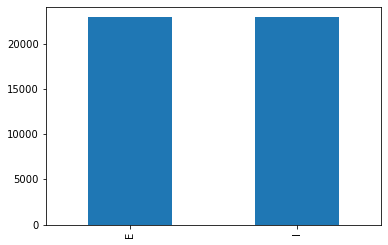

In [6]:
print(balanced_data['type'].value_counts())
balanced_data['type'].value_counts().plot.bar(x='type', y='Frequency')
balanced_data.to_json("training_90_string_balanced.json")

In [7]:
print(balanced_data['type'])

51240    I
87111    I
15465    I
29031    I
42804    I
        ..
60849    E
53812    E
76667    E
65537    E
70720    E
Name: type, Length: 45756, dtype: object


In [42]:
#from sklearn.model_selection import StratifiedKFold

#kf = StratifiedKFold(n_splits=5, shuffle=True)

#splits = []
#for train_indexes, test_indexes in kf.split(balanced_data, balanced_data['type']):
#    splits.append({'train': train_indexes, 'test': test_indexes})
#    print("TRAIN:", train_indexes, "TEST:", test_indexes)

#print(splits)
